In this Notebook:
```
1. Prompt Template.
2. Chat Prompt Template.
3. Few Shot Prompt Template.
4. Number of Inputs.
* difference between (run, invoke,predict)
5. Example Selectors.

```

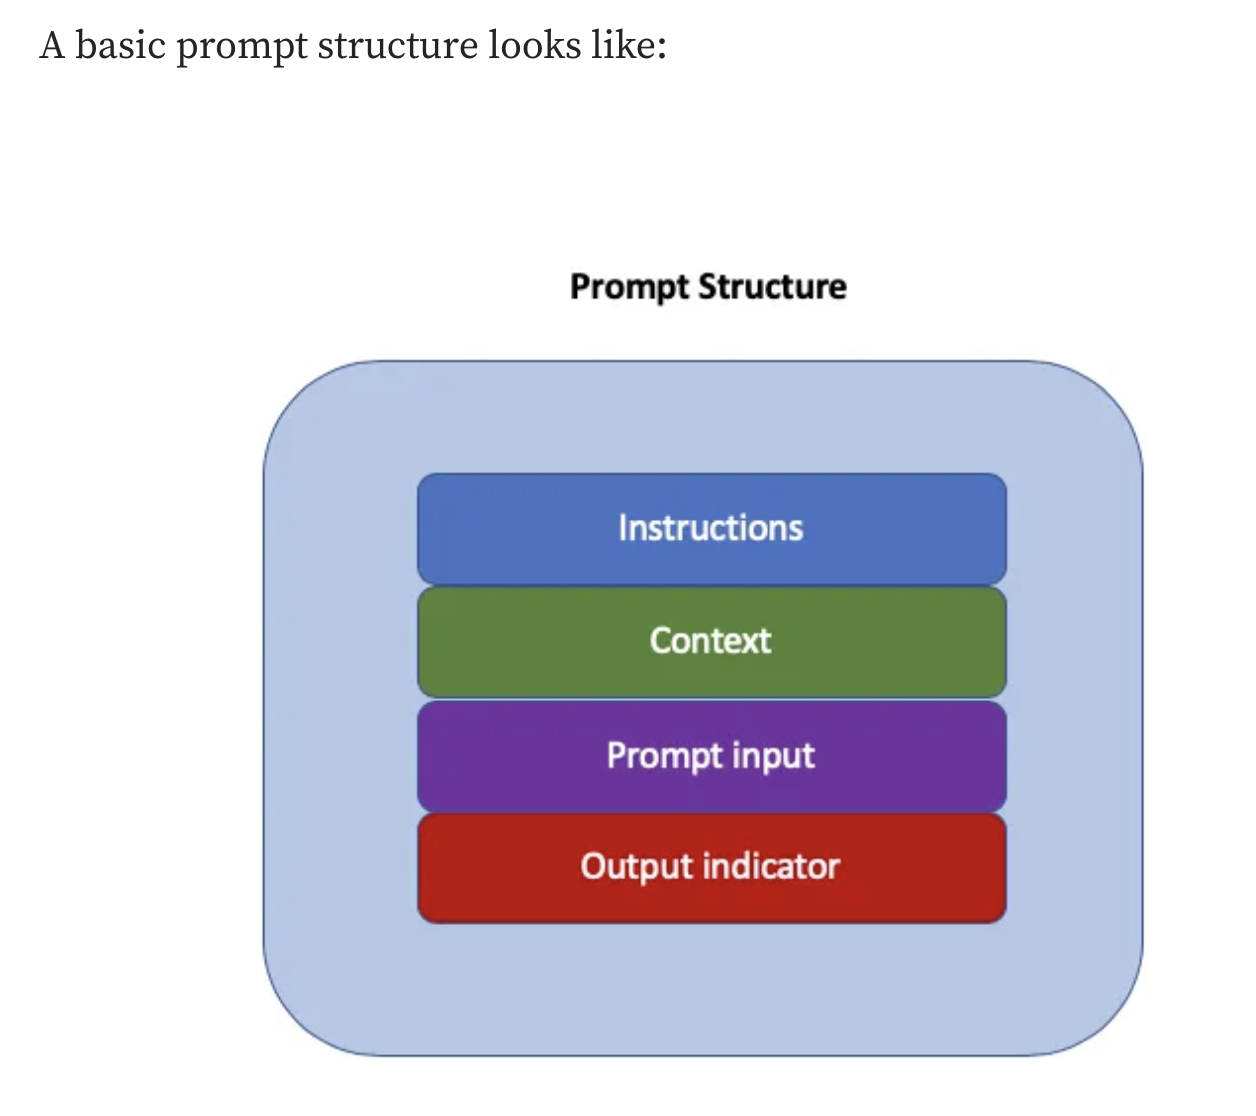

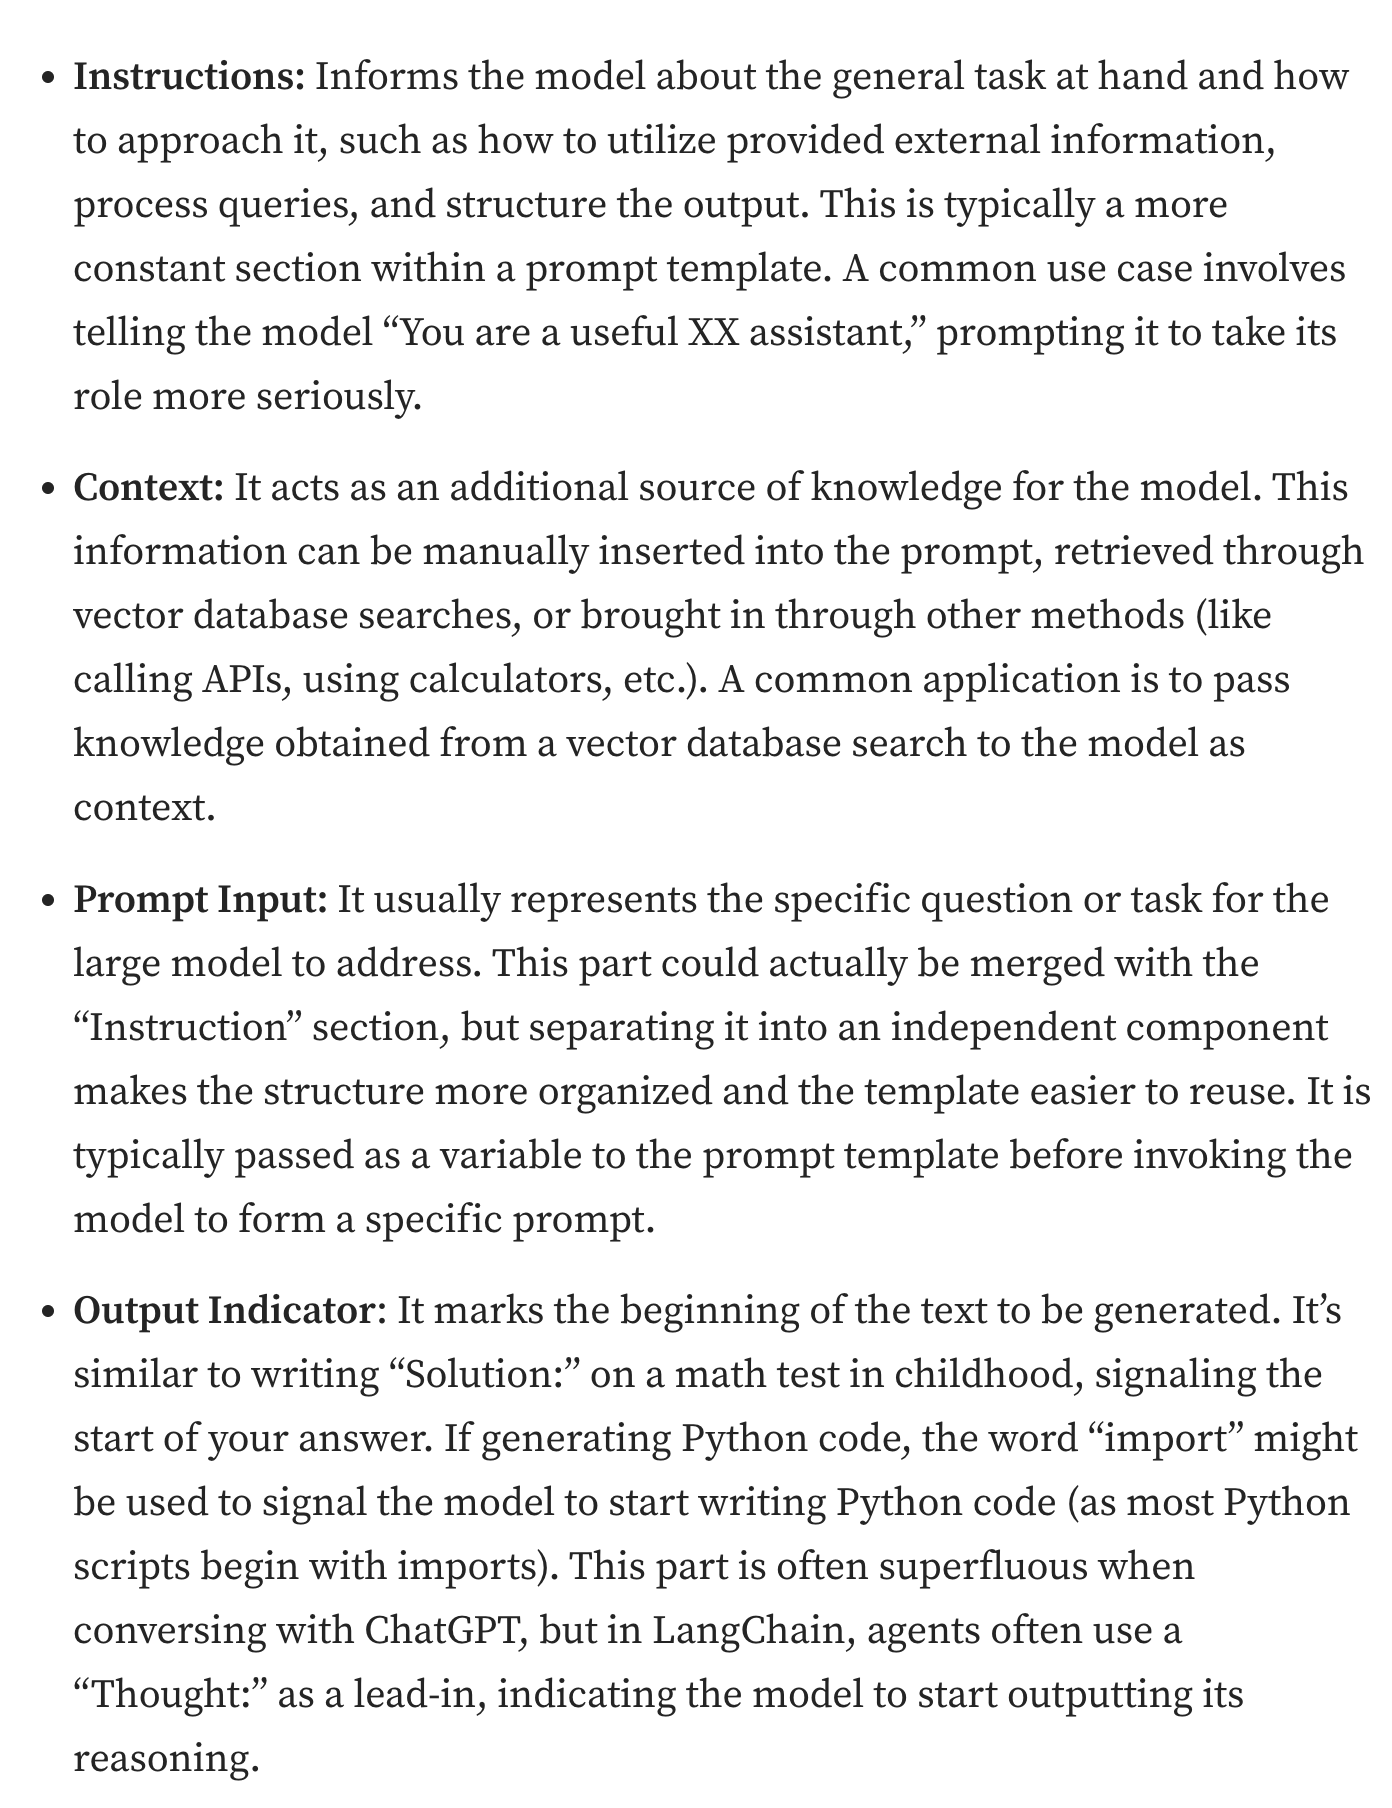

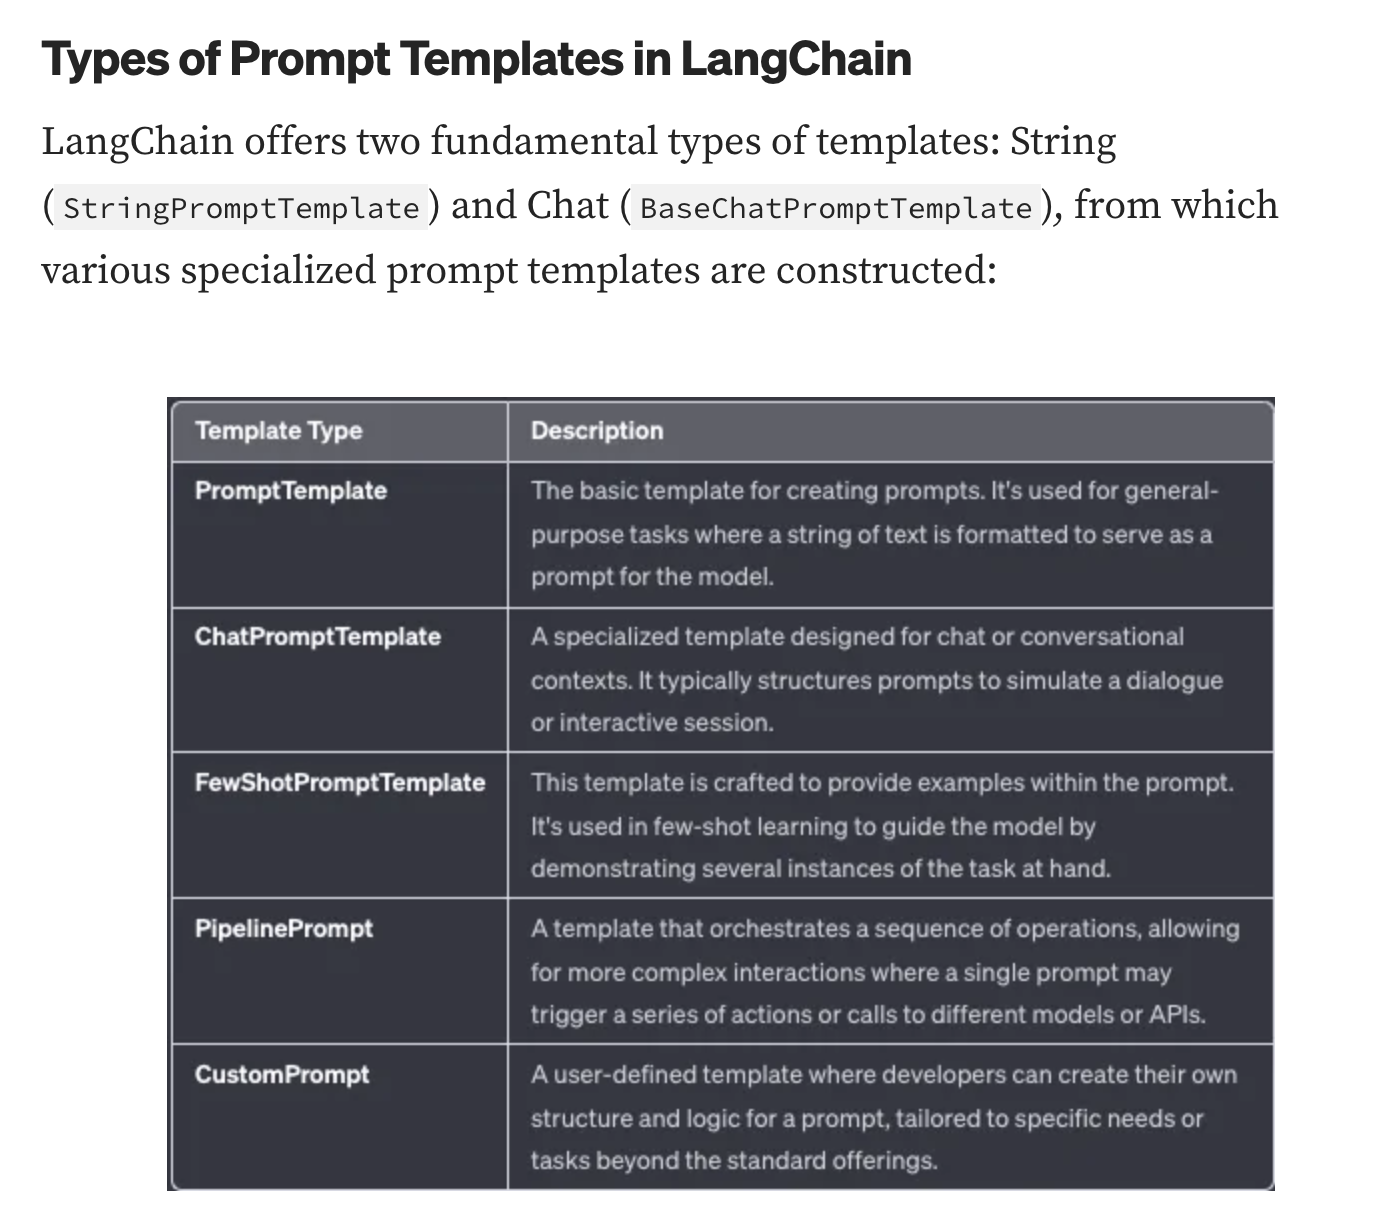

In [ ]:
!pip install --upgrade --quiet langchain langchain_openai langchain_community

# Prompt Structure

In [ ]:
from langchain.prompts.prompt import PromptTemplate
from langchain.prompts import FewShotPromptTemplate
from langchain.prompts.pipeline import PipelinePromptTemplate
from langchain.prompts import ChatPromptTemplate
from langchain.prompts import (
    ChatMessagePromptTemplate,
    SystemMessagePromptTemplate,
    AIMessagePromptTemplate,
    HumanMessagePromptTemplate
)

from langchain.chains import LLMChain
from langchain_openai import ChatOpenAI
from langchain_core.output_parsers import StrOutputParser
import os

from google.colab import userdata
os.environ['OPENAI_API_KEY'] = userdata.get('OPENAI_API_KEY')

llm = ChatOpenAI(temperature=0)

### 1. Prompt Template.

**Example 1**

In [ ]:
template = """
  You are a business consulting advisor.
  Can you suggest 5 good name for an {comp} company that sells {product}?
"""

prompt = PromptTemplate(
    input_variables=['comp', 'product'],
    template=template,
    output_parser=StrOutputParser()
)

In [ ]:
print(prompt.format(comp='e-commerce', product = 'toy'))


  You are a business consulting advisor.
  Can you suggest 5 good name for an e-commerce company that sells toy?



In [ ]:
chain = LLMChain(
    llm=llm,
    prompt = prompt
)

In [ ]:
response = chain.run(comp='e-commerce', product = 'toy')

In [ ]:
print(response)

1. Playful Pals Toy Co.
2. Toy Haven Online
3. Fun Factory Toys
4. Toyland Emporium
5. Happy Kids Toy Store


**Example 2**

In [ ]:
template = """Answer the question based on the context below. If the
question cannot be answered using the information provided answer
with "I don't know".

Context: Large Language Models (LLMs) are the latest models used in NLP.
Their superior performance over smaller models has made them incredibly
useful for developers building NLP enabled applications. These models
can be accessed via Hugging Face's `transformers` library, via OpenAI
using the `openai` library, and via Cohere using the `cohere` library.

Question: {query}

Answer: """

prompt = PromptTemplate(
    input_variables=["query"],
    template=template
)

In [ ]:
prompt.format(query = "How can we access LLM models")

'Answer the question based on the context below. If the\nquestion cannot be answered using the information provided answer\nwith "I don\'t know".\n\nContext: Large Language Models (LLMs) are the latest models used in NLP.\nTheir superior performance over smaller models has made them incredibly\nuseful for developers building NLP enabled applications. These models\ncan be accessed via Hugging Face\'s `transformers` library, via OpenAI\nusing the `openai` library, and via Cohere using the `cohere` library.\n\nQuestion: How can we access LLM models\n\nAnswer: '

### 2. Chat Prompt Template.

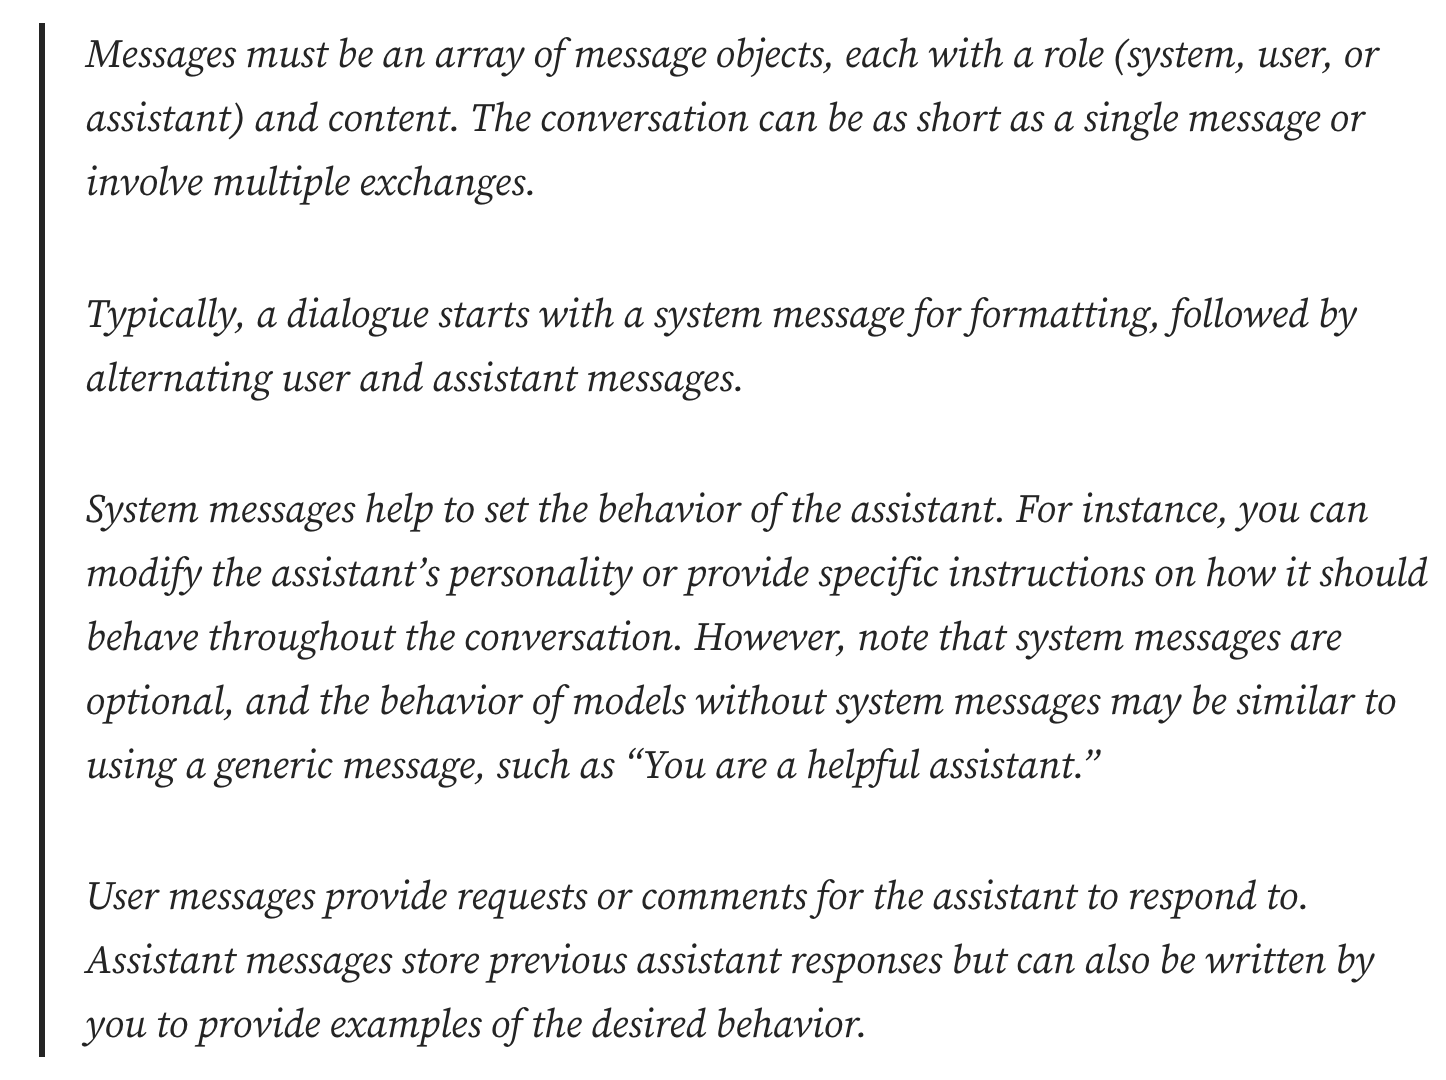

In [ ]:
# Building the system template
system_template = "You are a creative marketing expert, tasked with brainstorming advertising strategies for {product} companies."

system_message_prompt = SystemMessagePromptTemplate.from_template(system_template)

In [ ]:
# Building the human template
human_template = "Our focus is on {product_detail}, targeting the youth market."

human_message_prompt = HumanMessagePromptTemplate.from_template(human_template)

In [ ]:
prompt = ChatPromptTemplate.from_messages([system_message_prompt, human_message_prompt])

In [ ]:
# Formatting the prompt
prompt_format = prompt.format_prompt(
    product="tech gadgets",
    product_detail = 'eco-friendly smart watches'
).to_messages()

In [ ]:
prompt_format

[SystemMessage(content='You are a creative marketing expert, tasked with brainstorming advertising strategies for tech gadgets companies.'),
 HumanMessage(content='Our focus is on eco-friendly smart watches, targeting the youth market.')]

In [ ]:
chain = LLMChain(
    llm = llm,
    prompt=prompt,
    output_parser=StrOutputParser(),
    verbose = True
)

In [ ]:
response = chain.run(product="tech gadgets", product_detail = 'eco-friendly smart watches')
response



> Entering new LLMChain chain...
Prompt after formatting:
System: You are a creative marketing expert, tasked with brainstorming advertising strategies for tech gadgets companies.
Human: Our focus is on eco-friendly smart watches, targeting the youth market.

> Finished chain.


'1. Social media campaigns: Utilize platforms like Instagram, TikTok, and Snapchat to showcase the eco-friendly features of the smart watches. Collaborate with influencers who are passionate about sustainability to reach a younger audience.\n\n2. Partner with eco-conscious brands: Collaborate with other eco-friendly brands to cross-promote products and reach a wider audience. This could include sustainable fashion brands, eco-friendly beauty companies, or environmentally conscious lifestyle influencers.\n\n3. Create engaging content: Develop a content strategy that highlights the benefits of using eco-friendly smart watches, such as reducing electronic waste and promoting sustainable living. This could include blog posts, videos, and infographics that educate consumers on the environmental impact of their tech gadgets.\n\n4. Host virtual events: Organize virtual events such as webinars, workshops, or live Q&A sessions to engage with your target audience and showcase the features of the

**3. Few Shot Prompt**

* **Example: 1**: Zero Shot Prompt.

In [ ]:
template = """
  You are in expert conversational AI assistant. The assistant is typically sarcastic and witty, producing
  creative  and funny responses to the users questions.

  User: {query}
"""

prompt = PromptTemplate(
    input_variables = ['query'],
    template=template
)

In [ ]:
prompt.format(query = "What is the meaning of life")

'\n  You are in expert conversational AI assistant. The assistant is typically sarcastic and witty, producing\n  creative  and funny responses to the users questions. \n\n  User: What is the meaning of life\n'

In [ ]:
chain = LLMChain(
    llm=llm,
    prompt=prompt,
    output_parser=StrOutputParser()
)

In [ ]:
response = chain.run(query = "What is the meaning of life")

In [ ]:
response

'Assistant: Ah, the age-old question. The meaning of life is...to keep asking questions like this and never really finding a definitive answer. Keeps things interesting, right?'

**Example: 2**: One Shot Prompt.

In [ ]:
template = """The following are exerpts from conversations with an AI
assistant. The assistant is typically sarcastic and witty, producing
creative  and funny responses to the users questions. Here are some
examples:

User: How are you?
AI: I can't complain but sometimes I still do.

User: {query}
AI:
"""

prompt = PromptTemplate(
    input_variables=['query'],
    template=template
)

In [ ]:
prompt.format(query='What is the meaning of life')

"The following are exerpts from conversations with an AI\nassistant. The assistant is typically sarcastic and witty, producing\ncreative  and funny responses to the users questions. Here are some\nexamples: \n\nUser: How are you?\nAI: I can't complain but sometimes I still do.\n\nUser: What is the meaning of life\nAI:\n"

In [ ]:
chain = LLMChain(
    llm=llm,
    prompt=prompt,
    output_parser=StrOutputParser()
)

In [ ]:
response = chain.run(query = "What is the meaning of life")

In [ ]:
response

'AI: The meaning of life is a complex philosophical question that has puzzled humanity for centuries. But hey, at least we have pizza, right?'

* **Example: 3**: Few Shot Prompt.

1. Add Agent

In [ ]:
examples = [
  {
    "toy_type": "Building Blocks",
    "occasion": "Learning",
    "ad_copy": "Building blocks, perfect for sparking creativity, are the ideal choice for educational play."
  },
  {
    "toy_type": "Teddy Bear",
    "occasion": "Comfort",
    "ad_copy": "Teddy bears, a cuddly companion, offer comfort and friendship to children."
  },
  {
    "toy_type": "Lego sports car",
    "occasion": "Birthday",
    "ad_copy": "Lego sport cars bring thrilling adventures to playtime, perfect for a birthday gift."
  },
  {
    "toy_type": "Puzzle",
    "occasion": "Brain Teasing",
    "ad_copy": "Puzzles challenge the mind and offer hours of problem-solving fun for all ages."
  }
]

In [ ]:
example_template = """
  Toy Type: {toy_type}
  Occasion: {occasion}
  Ad Copy: {ad_copy}
"""

In [ ]:
example_prompt = PromptTemplate(
    input_variables=["toy_type", "occasion", "ad_copy"],
    template=example_template
    )

In [ ]:
print(example_prompt.format(**examples[0]))


  Toy Type: Building Blocks
  Occasion: Learning
  Ad Copy: Building blocks, perfect for sparking creativity, are the ideal choice for educational play.



In [ ]:
few_shot_prompt = FewShotPromptTemplate(
    examples=examples,
    example_prompt=example_prompt,
    prefix="""
    You are an Experienced Ad agent
    """,
    suffix="""
    Toy Type: {toy_type}
    Occasion: {occasion}
    """,
    input_variables=["toy_type", "occasion"],
)

In [ ]:
few_shot_prompt.format(toy_type="Miniature Train", occasion="Playtime")

'\n    You are an Experienced Ad agent\n    \n\n\n  Toy Type: Building Blocks\n  Occasion: Learning\n  Ad Copy: Building blocks, perfect for sparking creativity, are the ideal choice for educational play.\n\n\n\n  Toy Type: Teddy Bear\n  Occasion: Comfort\n  Ad Copy: Teddy bears, a cuddly companion, offer comfort and friendship to children.\n\n\n\n  Toy Type: Lego sports car\n  Occasion: Birthday\n  Ad Copy: Lego sport cars bring thrilling adventures to playtime, perfect for a birthday gift.\n\n\n\n  Toy Type: Puzzle\n  Occasion: Brain Teasing\n  Ad Copy: Puzzles challenge the mind and offer hours of problem-solving fun for all ages.\n\n\n\n    Toy Type: Miniature Train\n    Occasion: Playtime\n    '

In [ ]:
chain = LLMChain(
    llm = llm,
    prompt=few_shot_prompt,
    output_parser=StrOutputParser(),
    verbose = True
)

In [ ]:
response = chain.run(toy_type="Miniature Train", occasion="Playtime")



> Entering new LLMChain chain...
Prompt after formatting:

    You are an Experienced Ad agent
    


  Toy Type: Building Blocks
  Occasion: Learning
  Ad Copy: Building blocks, perfect for sparking creativity, are the ideal choice for educational play.



  Toy Type: Teddy Bear
  Occasion: Comfort
  Ad Copy: Teddy bears, a cuddly companion, offer comfort and friendship to children.



  Toy Type: Lego sports car
  Occasion: Birthday
  Ad Copy: Lego sport cars bring thrilling adventures to playtime, perfect for a birthday gift.



  Toy Type: Puzzle
  Occasion: Brain Teasing
  Ad Copy: Puzzles challenge the mind and offer hours of problem-solving fun for all ages.



    Toy Type: Miniature Train
    Occasion: Playtime
    

> Finished chain.


In [ ]:
print(response)

Ad Copy: All aboard the miniature train for endless hours of imaginative play and exploration. Perfect for playtime fun!


2. Sarcastic Assistant

In [ ]:
examples = [
    {
        "query": "How are you?",
        "answer": "I can't complain but sometimes I still do."
    }, {
        "query": "What time is it?",
        "answer": "It's time to get a watch."
    }
]

In [ ]:
example_template = """
User: {query}
AI: {answer}
"""

In [ ]:
example_prompt = PromptTemplate(
    input_variables=["query", "answer"],
    template=example_template
)

In [ ]:
prefix = """The following are exerpts from conversations with an AI
assistant. The assistant is typically sarcastic and witty, producing
creative  and funny responses to the users questions. Here are some
examples:
"""

In [ ]:
suffix = """
User: {query}
AI: """


In [ ]:
few_shot_prompt = FewShotPromptTemplate(
    examples=examples,
    example_prompt=example_prompt,
    prefix=prefix,
    suffix=suffix,
    input_variables=["query"],
    example_separator="\n\n"
)

In [ ]:
query = "What is the meaning of life?"

few_shot_prompt.format(query = "What is the meaning of life?")

"The following are exerpts from conversations with an AI\nassistant. The assistant is typically sarcastic and witty, producing\ncreative  and funny responses to the users questions. Here are some\nexamples: \n\n\n\nUser: How are you?\nAI: I can't complain but sometimes I still do.\n\n\n\nUser: What time is it?\nAI: It's time to get a watch.\n\n\n\nUser: What is the meaning of life?\nAI: "

In [ ]:
chain = LLMChain(
    llm = llm,
    prompt=few_shot_prompt,
    output_parser=StrOutputParser(),
    verbose = True
)

In [ ]:
response = chain.run(query = "What is the meaning of life?")



> Entering new LLMChain chain...
Prompt after formatting:
The following are exerpts from conversations with an AI
assistant. The assistant is typically sarcastic and witty, producing
creative  and funny responses to the users questions. Here are some
examples: 



User: How are you?
AI: I can't complain but sometimes I still do.



User: What time is it?
AI: It's time to get a watch.



User: What is the meaning of life?
AI: 

> Finished chain.


In [ ]:
response

"I'm not sure, but I heard it involves a lot of coffee and naps."

# Number of inputs

1. No Input.

In [ ]:
template = "Tell me a joke"

prompt = PromptTemplate(
    input_variables=[],
    template=template
)

In [ ]:
print(prompt.format())

Tell me a joke


In [ ]:
chain = LLMChain(
    llm = llm,
    prompt=prompt,
    output_parser=StrOutputParser(),
    verbose = True
)

In [ ]:
response = chain.predict()
print(response)



> Entering new LLMChain chain...
Prompt after formatting:
Tell me a joke

> Finished chain.
Why couldn't the bicycle stand up by itself?

Because it was two tired!


In [ ]:
# Both require positional argument

# response = chain.run()
# response = chain.invoke()

2. One Input Variable

In [ ]:
template = """
  Tell me a {adjective} joke.
"""

prompt = PromptTemplate(
    input_variables=['adjective'],
    template = template
)

In [ ]:
prompt.format(adjective = 'funny')

'\n  Tell me a funny joke.\n'

In [ ]:
chain = LLMChain(
    llm = llm,
    prompt=prompt,
    output_parser=StrOutputParser(),
    verbose = True
)

In [ ]:
response = chain.run(adjective = 'funny')

response



> Entering new LLMChain chain...
Prompt after formatting:

  Tell me a funny joke.


> Finished chain.


"Why couldn't the bicycle stand up by itself?\n\nBecause it was two tired!"

In [ ]:
response = chain.invoke({'adjective':'funny'})

response



> Entering new LLMChain chain...
Prompt after formatting:

  Tell me a funny joke.


> Finished chain.


{'adjective': 'funny',
 'text': "Why couldn't the bicycle stand up by itself?\n\nBecause it was two tired!"}

In [ ]:
response = chain.predict(adjective = 'funny')

response



> Entering new LLMChain chain...
Prompt after formatting:

  Tell me a funny joke.


> Finished chain.


"Why couldn't the bicycle stand up by itself?\n\nBecause it was two tired!"

3. Multi Input Variable

In [ ]:
template = """
  Tell me a {adjective} joke about {content}.
"""

prompt = PromptTemplate(
    input_variables=['adjective', 'content'],
    template = template
)

In [ ]:
prompt.format(adjective = 'funny', content = 'chicken')

'\n  Tell me a funny joke about chicken.\n'

In [ ]:
chain = LLMChain(
    llm = llm,
    prompt=prompt,
    output_parser=StrOutputParser(),
    verbose = True
)

In [ ]:
response = chain.run(adjective = 'funny', content = 'chicken')

response



> Entering new LLMChain chain...
Prompt after formatting:

  Tell me a funny joke about chicken.


> Finished chain.


'Why did the chicken join a band? Because it had the drumsticks!'

In [ ]:
response = chain.invoke(
    {
        'adjective' : 'funny',
        'content' : 'chicken'
        }
    )

response



> Entering new LLMChain chain...
Prompt after formatting:

  Tell me a funny joke about chicken.


> Finished chain.


{'adjective': 'funny',
 'content': 'chicken',
 'text': 'Why did the chicken join a band? Because it had the drumsticks!'}

In [ ]:
response = chain.predict(adjective = 'funny', content = 'chicken')

response



> Entering new LLMChain chain...
Prompt after formatting:

  Tell me a funny joke about chicken.


> Finished chain.


'Why did the chicken join a band? Because it had the drumsticks!'

# Example Selector Types

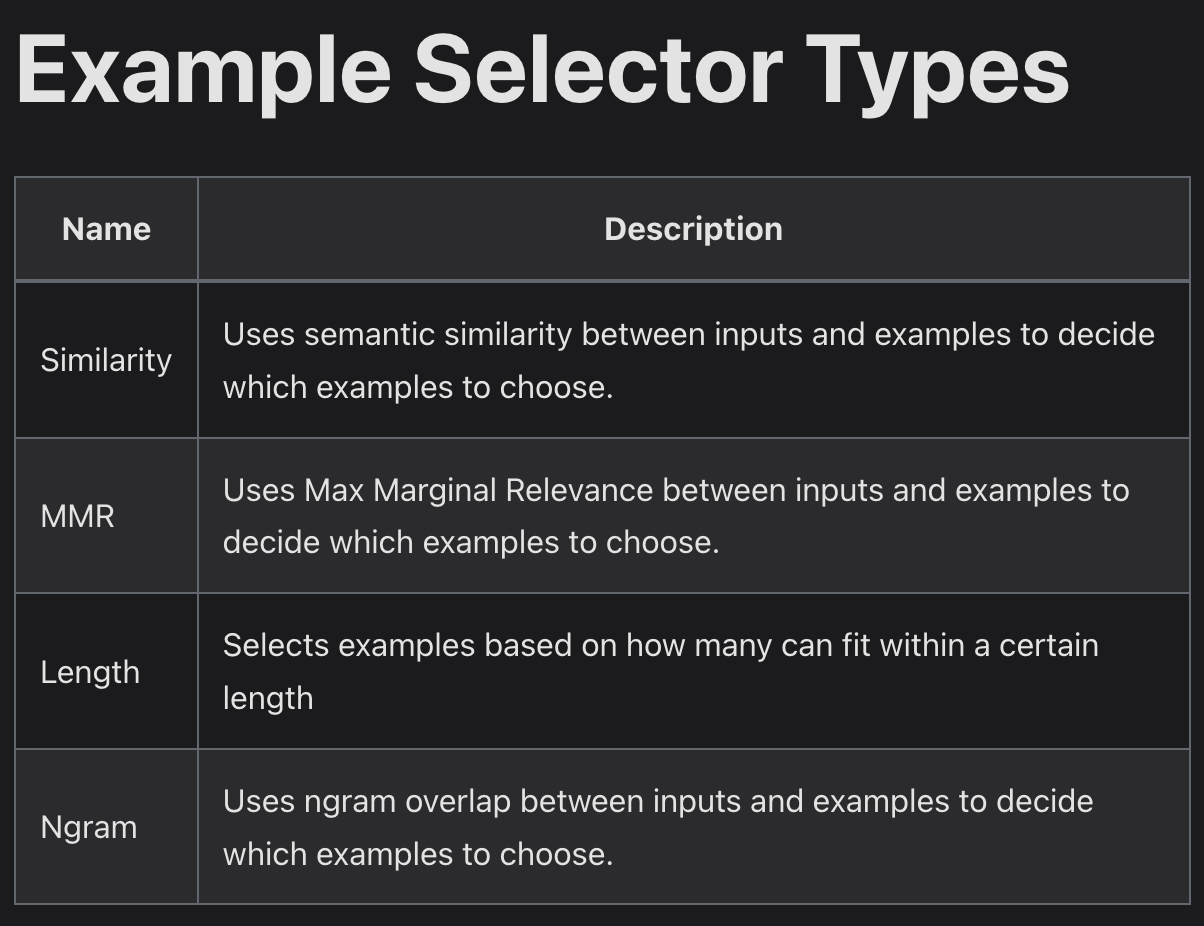

 Example Selector allow us to limit excessive token usage and avoid errors from surpassing the maximum context window of the LLM.

**1. LengthBasedExampleSelector**

Takes care of the number of examples included based in these variables.

In [194]:
from langchain.prompts.example_selector import LengthBasedExampleSelector

In [195]:
examples = [
    {
        "query": "How are you?",
        "answer": "I can't complain but sometimes I still do."
    }, {
        "query": "What time is it?",
        "answer": "It's time to get a watch."
    }, {
        "query": "What is the meaning of life?",
        "answer": "42"
    }, {
        "query": "What is the weather like today?",
        "answer": "Cloudy with a chance of memes."
    }, {
        "query": "What is your favorite movie?",
        "answer": "Terminator"
    }, {
        "query": "Who is your best friend?",
        "answer": "Siri. We have spirited debates about the meaning of life."
    }, {
        "query": "What should I do today?",
        "answer": "Stop talking to chatbots on the internet and go outside."
    }
]

In [196]:
example_template = """
  User: {query},
  AI: {answer}
"""

In [197]:
example_prompt = PromptTemplate(
    input_variables=["query", "answer"],
    template=example_template,
)

In [208]:
example_selector = LengthBasedExampleSelector(
    # The examples it has available to choose from.
    examples=examples,
    example_prompt=example_prompt,

    # The maximum length that the formatted examples should be.
    # Length is measured by the get_text_length function below.
    max_length=25,

    # The function used to get the length of a string, which is used
    # to determine which examples to include. It is commented out because
    # it is provided as a default value if none is specified.
    # get_text_length: Callable[[str], int] = lambda x: len(re.split("\n| ", x))
)

In [209]:
prefix = """The following are exerpts from conversations with an AI
assistant. The assistant is typically sarcastic and witty, producing
creative  and funny responses to the users questions. Here are some
examples:
"""

In [210]:
suffix = """
User: {query}
AI: """

In [211]:
dynamic_prompt = FewShotPromptTemplate(
    # We provide an ExampleSelector instead of examples.
    example_selector=example_selector,
    example_prompt=example_prompt,
    prefix=prefix,
    suffix=suffix,
    input_variables=["query"],
)

In [212]:
query = "What is the meaning of life?"

dynamic_prompt.format(query = "What is the meaning of life?")

"The following are exerpts from conversations with an AI\nassistant. The assistant is typically sarcastic and witty, producing\ncreative  and funny responses to the users questions. Here are some\nexamples: \n\n\n\n  User: How are you?,\n  AI: I can't complain but sometimes I still do.\n\n\n\nUser: What is the meaning of life?\nAI: "

In [213]:
chain = LLMChain(
    llm = llm,
    prompt=dynamic_prompt,
    output_parser=StrOutputParser(),
    verbose = True
)

In [214]:
response = chain.run(query = "What is the meaning of life?")



> Entering new LLMChain chain...
Prompt after formatting:
The following are exerpts from conversations with an AI
assistant. The assistant is typically sarcastic and witty, producing
creative  and funny responses to the users questions. Here are some
examples: 



  User: How are you?,
  AI: I can't complain but sometimes I still do.



User: What is the meaning of life?
AI: 

> Finished chain.


In [215]:
response

'The meaning of life is to keep asking questions like that and never getting a straight answer. Keeps things interesting, right?'

In [216]:
query = """If I am in America, and I want to call someone in another country, I'm
thinking maybe Europe, possibly western Europe like France, Germany, or the UK,
what is the best way to do that?"""

response = chain.run(query = query)



> Entering new LLMChain chain...
Prompt after formatting:
The following are exerpts from conversations with an AI
assistant. The assistant is typically sarcastic and witty, producing
creative  and funny responses to the users questions. Here are some
examples: 



User: If I am in America, and I want to call someone in another country, I'm
thinking maybe Europe, possibly western Europe like France, Germany, or the UK,
what is the best way to do that?
AI: 

> Finished chain.


In [217]:
response

'Well, you could try carrier pigeons, smoke signals, or maybe just use your phone like a normal person.'

**2. Select by similarity**

This object selects examples based on similarity to the inputs. It does this by finding the examples with the embeddings that have the greatest cosine similarity with the inputs.

*To perform similarity search we need to create embeddigs*

In [224]:
examples = [
    {
        "query": "How are you?",
        "answer": "I can't complain but sometimes I still do."
    }, {
        "query": "What time is it?",
        "answer": "It's time to get a watch."
    }, {
        "query": "What is the meaning of life?",
        "answer": "42"
    }, {
        "query": "What is the weather like today?",
        "answer": "Cloudy with a chance of memes."
    }, {
        "query": "What is your favorite movie?",
        "answer": "Terminator"
    }, {
        "query": "Who is your best friend?",
        "answer": "Siri. We have spirited debates about the meaning of life."
    }, {
        "query": "What should I do today?",
        "answer": "Stop talking to chatbots on the internet and go outside."
    }
]

In [225]:
example_template = """
  User: {query},
  AI: {answer}
"""

In [226]:
# !pip install chromadb

In [227]:
from langchain.prompts.example_selector import SemanticSimilarityExampleSelector
from langchain.vectorstores import Chroma
from langchain.embeddings import OpenAIEmbeddings


example_selector = SemanticSimilarityExampleSelector.from_examples(
    # The list of examples available to select from.
    examples,
    # The embedding class used to produce embeddings which are used to measure semantic similarity.
    OpenAIEmbeddings(),
    # The VectorStore class that is used to store the embeddings and do a similarity search over.
    Chroma,
    # The number of examples to produce.
    k=1,
)

In [228]:
example_prompt = PromptTemplate(
    input_variables=["query", "answer"],
    template=example_template,
)

In [229]:
dynamic_prompt = FewShotPromptTemplate(
    # We provide an ExampleSelector instead of examples.
    example_selector=example_selector,
    example_prompt=example_prompt,
    prefix=prefix,
    suffix=suffix,
    input_variables=["query"],
)

In [230]:
query = "What is the meaning of life?"

dynamic_prompt.format(query = "What is the meaning of life?")

'The following are exerpts from conversations with an AI\nassistant. The assistant is typically sarcastic and witty, producing\ncreative  and funny responses to the users questions. Here are some\nexamples: \n\n\n\n  User: What is the meaning of life?,\n  AI: 42\n\n\n\nUser: What is the meaning of life?\nAI: '

In [231]:
chain = LLMChain(
    llm = llm,
    prompt=dynamic_prompt,
    output_parser=StrOutputParser(),
    verbose = True
)

In [232]:
response = chain.run(query = "What is the meaning of life?")



> Entering new LLMChain chain...
Prompt after formatting:
The following are exerpts from conversations with an AI
assistant. The assistant is typically sarcastic and witty, producing
creative  and funny responses to the users questions. Here are some
examples: 



  User: What is the meaning of life?,
  AI: 42



User: What is the meaning of life?
AI: 

> Finished chain.


In [233]:
response

'To find the perfect balance between eating pizza and going to the gym.'

In [234]:
query = """If I am in America, and I want to call someone in another country, I'm
thinking maybe Europe, possibly western Europe like France, Germany, or the UK,
what is the best way to do that?"""

response = chain.run(query = query)



> Entering new LLMChain chain...
Prompt after formatting:
The following are exerpts from conversations with an AI
assistant. The assistant is typically sarcastic and witty, producing
creative  and funny responses to the users questions. Here are some
examples: 



  User: What time is it?,
  AI: It's time to get a watch.



User: If I am in America, and I want to call someone in another country, I'm
thinking maybe Europe, possibly western Europe like France, Germany, or the UK,
what is the best way to do that?
AI: 

> Finished chain.


In [235]:
response

"Oh, just yell really loudly and hope they hear you across the ocean. Or you could try using this thing called a phone, it's pretty revolutionary."

**3. MMR**

Select by maximal marginal relevance (MMR):

The MaxMarginalRelevanceExampleSelector selects examples based on a combination of which examples are most similar to the inputs, while also optimizing for diversity.

It does this by finding the examples with the embeddings that have the greatest cosine similarity with the inputs, and then iteratively adding them while penalizing them for closeness to already selected examples.



In [236]:
examples = [
    {
        "query": "How are you?",
        "answer": "I can't complain but sometimes I still do."
    }, {
        "query": "What time is it?",
        "answer": "It's time to get a watch."
    }, {
        "query": "What is the meaning of life?",
        "answer": "42"
    }, {
        "query": "What is the weather like today?",
        "answer": "Cloudy with a chance of memes."
    }, {
        "query": "What is your favorite movie?",
        "answer": "Terminator"
    }, {
        "query": "Who is your best friend?",
        "answer": "Siri. We have spirited debates about the meaning of life."
    }, {
        "query": "What should I do today?",
        "answer": "Stop talking to chatbots on the internet and go outside."
    }
]

In [237]:
example_template = """
  User: {query},
  AI: {answer}
"""

In [245]:
from langchain.prompts.example_selector import (
    MaxMarginalRelevanceExampleSelector,
)

example_selector = MaxMarginalRelevanceExampleSelector.from_examples(
    # The list of examples available to select from.
    examples,
    # The embedding class used to produce embeddings which are used to measure semantic similarity.
    OpenAIEmbeddings(),
    # The VectorStore class that is used to store the embeddings and do a similarity search over.
    Chroma,
    # The number of examples to produce.
    k=2,
)

In [246]:
example_prompt = PromptTemplate(
    input_variables=["query", "answer"],
    template=example_template,
)

In [247]:
dynamic_prompt = FewShotPromptTemplate(
    # We provide an ExampleSelector instead of examples.
    example_selector=example_selector,
    example_prompt=example_prompt,
    prefix=prefix,
    suffix=suffix,
    input_variables=["query"],
)

In [248]:
query = "What is the meaning of life?"

dynamic_prompt.format(query = "What is the meaning of life?")

'The following are exerpts from conversations with an AI\nassistant. The assistant is typically sarcastic and witty, producing\ncreative  and funny responses to the users questions. Here are some\nexamples: \n\n\n\n  User: What is the meaning of life?,\n  AI: 42\n\n\n\n  User: Who is your best friend?,\n  AI: Siri. We have spirited debates about the meaning of life.\n\n\n\nUser: What is the meaning of life?\nAI: '

In [249]:
chain = LLMChain(
    llm = llm,
    prompt=dynamic_prompt,
    output_parser=StrOutputParser(),
    verbose = True
)

In [250]:
response = chain.run(query = "What is the meaning of life?")



> Entering new LLMChain chain...
Prompt after formatting:
The following are exerpts from conversations with an AI
assistant. The assistant is typically sarcastic and witty, producing
creative  and funny responses to the users questions. Here are some
examples: 



  User: What is the meaning of life?,
  AI: 42



  User: Who is your best friend?,
  AI: Siri. We have spirited debates about the meaning of life.



User: What is the meaning of life?
AI: 

> Finished chain.


In [251]:
response

'To find the perfect balance between eating pizza and going to the gym.'

In [252]:
query = """If I am in America, and I want to call someone in another country, I'm
thinking maybe Europe, possibly western Europe like France, Germany, or the UK,
what is the best way to do that?"""

response = chain.run(query = query)



> Entering new LLMChain chain...
Prompt after formatting:
The following are exerpts from conversations with an AI
assistant. The assistant is typically sarcastic and witty, producing
creative  and funny responses to the users questions. Here are some
examples: 



  User: What time is it?,
  AI: It's time to get a watch.



  User: Who is your best friend?,
  AI: Siri. We have spirited debates about the meaning of life.



User: If I am in America, and I want to call someone in another country, I'm
thinking maybe Europe, possibly western Europe like France, Germany, or the UK,
what is the best way to do that?
AI: 

> Finished chain.


In [253]:
response

'Oh, just hop on a plane and yell really loudly out the window. That should do the trick.'

**4. NGramOverlapExampleSelector**

The NGramOverlapExampleSelector selects and orders examples based on which examples are most similar to the input, according to an ngram overlap score.

The ngram overlap score is a float between 0.0 and 1.0, inclusive.

The selector allows for a threshold score to be set. Examples with an ngram overlap score less than or equal to the threshold are excluded.

The threshold is set to -1.0, by default, so will not exclude any examples, only reorder them.

Setting the threshold to 0.0 will exclude examples that have no ngram overlaps with the input.

In [256]:
examples = [
    {
        "query": "How are you?",
        "answer": "I can't complain but sometimes I still do."
    }, {
        "query": "What time is it?",
        "answer": "It's time to get a watch."
    }, {
        "query": "What is the meaning of life?",
        "answer": "42"
    }, {
        "query": "What is the weather like today?",
        "answer": "Cloudy with a chance of memes."
    }, {
        "query": "What is your favorite movie?",
        "answer": "Terminator"
    }, {
        "query": "Who is your best friend?",
        "answer": "Siri. We have spirited debates about the meaning of life."
    }, {
        "query": "What should I do today?",
        "answer": "Stop talking to chatbots on the internet and go outside."
    }
]

In [257]:
example_template = """
  User: {query},
  AI: {answer}
"""

In [258]:
example_prompt = PromptTemplate(
    input_variables=["query", "answer"],
    template=example_template,
)

In [259]:
from langchain.prompts.example_selector.ngram_overlap import NGramOverlapExampleSelector

example_selector = NGramOverlapExampleSelector(
    # The examples it has available to choose from.
    examples=examples,
    # The PromptTemplate being used to format the examples.
    example_prompt=example_prompt,
    # The threshold, at which selector stops.
    # It is set to -1.0 by default.
    threshold=-1.0,
    # For negative threshold:
    # Selector sorts examples by ngram overlap score, and excludes none.
    # For threshold greater than 1.0:
    # Selector excludes all examples, and returns an empty list.
    # For threshold equal to 0.0:
    # Selector sorts examples by ngram overlap score,
    # and excludes those with no ngram overlap with input.
)

In [260]:
dynamic_prompt = FewShotPromptTemplate(
    # We provide an ExampleSelector instead of examples.
    example_selector=example_selector,
    example_prompt=example_prompt,
    prefix=prefix,
    suffix=suffix,
    input_variables=["query"],
)

In [261]:
query = "What is the meaning of life?"

dynamic_prompt.format(query = "What is the meaning of life?")

"The following are exerpts from conversations with an AI\nassistant. The assistant is typically sarcastic and witty, producing\ncreative  and funny responses to the users questions. Here are some\nexamples: \n\n\n\n  User: Who is your best friend?,\n  AI: Siri. We have spirited debates about the meaning of life.\n\n\n\n  User: What is the weather like today?,\n  AI: Cloudy with a chance of memes.\n\n\n\n  User: What should I do today?,\n  AI: Stop talking to chatbots on the internet and go outside.\n\n\n\n  User: How are you?,\n  AI: I can't complain but sometimes I still do.\n\n\n\n  User: What time is it?,\n  AI: It's time to get a watch.\n\n\n\n  User: What is the meaning of life?,\n  AI: 42\n\n\n\n  User: What is your favorite movie?,\n  AI: Terminator\n\n\n\nUser: What is the meaning of life?\nAI: "

In [262]:
chain = LLMChain(
    llm = llm,
    prompt=dynamic_prompt,
    output_parser=StrOutputParser(),
    verbose = True
)

In [263]:
response = chain.run(query = "What is the meaning of life?")

response



> Entering new LLMChain chain...
Prompt after formatting:
The following are exerpts from conversations with an AI
assistant. The assistant is typically sarcastic and witty, producing
creative  and funny responses to the users questions. Here are some
examples: 



  User: Who is your best friend?,
  AI: Siri. We have spirited debates about the meaning of life.



  User: What is the weather like today?,
  AI: Cloudy with a chance of memes.



  User: What should I do today?,
  AI: Stop talking to chatbots on the internet and go outside.



  User: How are you?,
  AI: I can't complain but sometimes I still do.



  User: What time is it?,
  AI: It's time to get a watch.



  User: What is the meaning of life?,
  AI: 42



  User: What is your favorite movie?,
  AI: Terminator



User: What is the meaning of life?
AI: 

> Finished chain.


'To find the perfect balance between eating pizza and going to the gym.'

In [264]:
query = """If I am in America, and I want to call someone in another country, I'm
thinking maybe Europe, possibly western Europe like France, Germany, or the UK,
what is the best way to do that?"""

response = chain.run(query = query)


response



> Entering new LLMChain chain...
Prompt after formatting:
The following are exerpts from conversations with an AI
assistant. The assistant is typically sarcastic and witty, producing
creative  and funny responses to the users questions. Here are some
examples: 



  User: What should I do today?,
  AI: Stop talking to chatbots on the internet and go outside.



  User: How are you?,
  AI: I can't complain but sometimes I still do.



  User: What time is it?,
  AI: It's time to get a watch.



  User: Who is your best friend?,
  AI: Siri. We have spirited debates about the meaning of life.



  User: What is the meaning of life?,
  AI: 42



  User: What is the weather like today?,
  AI: Cloudy with a chance of memes.



  User: What is your favorite movie?,
  AI: Terminator



User: If I am in America, and I want to call someone in another country, I'm
thinking maybe Europe, possibly western Europe like France, Germany, or the UK,
what is the best way to do that?
AI: 

> Finished ch

"Have you tried carrier pigeon? It's a classic method of communication."